In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import codecs, json, time, re, tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
with codecs.open('oilprice16to17.json', 'r', 'utf-8') as f:
    tweets = json.load(f, encoding='utf-8')

In [3]:
tweet_df = pd.DataFrame(tweets)
print(tweet_df["timestamp"].nunique())
tweet_df.info()

142578
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163764 entries, 0 to 163763
Data columns (total 9 columns):
fullname     163764 non-null object
id           163764 non-null object
likes        163764 non-null object
replies      163764 non-null object
retweets     163764 non-null object
text         163764 non-null object
timestamp    163764 non-null object
url          163764 non-null object
user         163764 non-null object
dtypes: object(9)
memory usage: 11.2+ MB


In [4]:
Date = []
Time = []
for time in tweet_df["timestamp"]:
    Date.append(datetime.strptime(time.split("T")[0], "%Y-%m-%d"))
    print('.', end='')

tweet_df["Date"] = Date
tweet_df.head()

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

,fullname,id,likes,replies,retweets,text,timestamp,url,user,Date
0,Latest News,809911081468563457,1,0,0,Oil price settles higher on Friday.. Related A...,2016-12-17T00:00:23,/latest_ooyuz/status/809911081468563457,latest_ooyuz,2016-12-17
1,*Citizen* Pug,809911927866527744,1,0,0,I love people that think they understand oil p...,2016-12-17T00:03:45,/LeepN147/status/809911927866527744,LeepN147,2016-12-17
2,Libya News,809913493235208193,0,0,0,Oil price settles higher on Friday\nhttp://www...,2016-12-17T00:09:58,/LibyanNewsBotEn/status/809913493235208193,LibyanNewsBotEn,2016-12-17
3,Раттана Женг Марай®,809913711540469760,0,0,0,Oil Rises As Markets Regain Faith In OPEC Deal...,2016-12-17T00:10:50,/KittyOwner_Club/status/809913711540469760,KittyOwner_Club,2016-12-17
4,Pierre C.,809913857447698432,1,1,1,OPEC+Russia=Oil Price Spike=$$$EXXON+TRUMP= In...,2016-12-17T00:11:25,/collegue57/status/809913857447698432,collegue57,2016-12-17


In [5]:
tweet_df = tweet_df.loc[:,["user","text","Date"]]
tweet_df.head()

,user,text,Date
0,latest_ooyuz,Oil price settles higher on Friday.. Related A...,2016-12-17
1,LeepN147,I love people that think they understand oil p...,2016-12-17
2,LibyanNewsBotEn,Oil price settles higher on Friday\nhttp://www...,2016-12-17
3,KittyOwner_Club,Oil Rises As Markets Regain Faith In OPEC Deal...,2016-12-17
4,collegue57,OPEC+Russia=Oil Price Spike=$$$EXXON+TRUMP= In...,2016-12-17


In [6]:
compound_list = []

for tweet in tweet_df["text"]:
    compound = analyzer.polarity_scores(tweet)["compound"]
    compound_list.append(compound)

tweet_df["Compound"] = compound_list
tweet_df.head()

,user,text,Date,Compound
0,latest_ooyuz,Oil price settles higher on Friday.. Related A...,2016-12-17,0.0000
1,LeepN147,I love people that think they understand oil p...,2016-12-17,0.7184
2,LibyanNewsBotEn,Oil price settles higher on Friday\nhttp://www...,2016-12-17,0.0000
3,KittyOwner_Club,Oil Rises As Markets Regain Faith In OPEC Deal...,2016-12-17,0.4215
4,collegue57,OPEC+Russia=Oil Price Spike=$$$EXXON+TRUMP= In...,2016-12-17,0.0000


In [7]:
tweet_df_mean = pd.DataFrame(tweet_df.groupby(["Date"])["Compound"].mean()).reset_index()
tweet_df_mean.head()

,Date,Compound
0,2016-12-17,-0.031509
1,2016-12-18,-0.055849
2,2016-12-19,0.029566
3,2016-12-20,-0.079733
4,2016-12-21,0.021886


# PART II: MARKET ANALYSIS

In [8]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')

In [11]:
# We would like all available data from MM/DD/YYYY until MM/DD/YYYY.
start_date = tweet_df_mean["Date"].min().strftime('%Y-%m-%d')
end_date = tweet_df_mean["Date"].max().strftime('%Y-%m-%d')
print("Start date is: "+start_date)
print("End date is: "+end_date)

Start date is: 2016-12-17
End date is: 2017-12-15


In [12]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['TOT', 'CVX', 'BP', 'SNP', 'XOM']

# Define which online source one should use
data_source = 'yahoo'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [13]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
adj_close = panel_data.ix['Adj Close']

# Getting all weekdays between MM/DD/YYYY and MM/DD/YYYY
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
adj_close = adj_close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
adj_close = adj_close.fillna(method='ffill')

adj_close.head()

/Users/jbui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,BP,CVX,SNP,TOT,XOM
2016-12-19,34.232555,113.154236,69.117783,46.930092,87.104240
2016-12-20,34.195099,113.442772,69.089272,47.026161,87.113876
2016-12-21,34.438545,113.404305,69.032249,47.583363,86.969368
2016-12-22,34.560272,114.231430,68.528580,48.092537,87.537743
2016-12-23,34.663269,113.894806,67.340660,48.236637,87.383606


In [14]:
adj_close["TOT Returns"] = ""
adj_close["CVX Returns"] = ""
adj_close["BP Returns"] = ""
adj_close["SNP Returns"] = ""
adj_close["XOM Returns"] = ""
adj_close.head()

,BP,CVX,SNP,TOT,XOM,TOT Returns,CVX Returns,BP Returns,SNP Returns,XOM Returns
2016-12-19,34.232555,113.154236,69.117783,46.930092,87.104240,,,,,
2016-12-20,34.195099,113.442772,69.089272,47.026161,87.113876,,,,,
2016-12-21,34.438545,113.404305,69.032249,47.583363,86.969368,,,,,
2016-12-22,34.560272,114.231430,68.528580,48.092537,87.537743,,,,,
2016-12-23,34.663269,113.894806,67.340660,48.236637,87.383606,,,,,


In [15]:
adj_close.index.name = "Date"
adj_close = adj_close.reset_index()
adj_close.head()

,Date,BP,CVX,SNP,TOT,XOM,TOT Returns,CVX Returns,BP Returns,SNP Returns,XOM Returns
0,2016-12-19,34.232555,113.154236,69.117783,46.930092,87.104240,,,,,
1,2016-12-20,34.195099,113.442772,69.089272,47.026161,87.113876,,,,,
2,2016-12-21,34.438545,113.404305,69.032249,47.583363,86.969368,,,,,
3,2016-12-22,34.560272,114.231430,68.528580,48.092537,87.537743,,,,,
4,2016-12-23,34.663269,113.894806,67.340660,48.236637,87.383606,,,,,


In [26]:
# Set initial return value as this is the start
adj_close.set_value(0, "TOT Returns", 0)
adj_close.set_value(0, "CVX Returns", 0)
adj_close.set_value(0, "BP Returns", 0)
adj_close.set_value(0, "SNP Returns", 0)
adj_close.set_value(0, "XOM Returns", 0)
i = 0

# Scaling Factor for comparison with Twitter
m = 5 

# Iterate through each row and calculate the daily returns
for index, row in adj_close.iterrows():
    if index==0:
        print("1st row skipped")
    else:
        try:
            # Calculate the daily returns
            tot_returns = ((row["TOT"]/adj_close["TOT"][i])-1)*m
            cvx_returns = ((row["CVX"]/adj_close["CVX"][i])-1)*m
            bp_returns = ((row["BP"]/adj_close["BP"][i])-1)*m
            snp_returns = ((row["SNP"]/adj_close["SNP"][i])-1)*m
            xom_returns = ((row["XOM"]/adj_close["XOM"][i])-1)*m
            
            # Set return values to appropriate index
            adj_close.set_value(index, "TOT Returns", tot_returns)
            adj_close.set_value(index, "CVX Returns", cvx_returns)
            adj_close.set_value(index, "BP Returns", bp_returns)
            adj_close.set_value(index, "SNP Returns", snp_returns)
            adj_close.set_value(index, "XOM Returns", xom_returns)
            i += 1
            print(".", end="")
        except:
            print("This doesn't work. Please try again")

adj_close_returns = adj_close.set_index("Date")
adj_close_returns.head()

1st row skipped
...................................................................................................................................................................................................................................................................

,BP,CVX,SNP,TOT,XOM,TOT Returns,CVX Returns,BP Returns,SNP Returns,XOM Returns
Date,,,,,,,,,,
2016-12-19,34.232555,113.154236,69.117783,46.930092,87.104240,0,0,0,0,0
2016-12-20,34.195099,113.442772,69.089272,47.026161,87.113876,0.0102353,0.0127497,-0.00547082,-0.00206249,0.00055313
2016-12-21,34.438545,113.404305,69.032249,47.583363,86.969368,0.0592438,-0.00169544,0.0355966,-0.00412676,-0.0082942
2016-12-22,34.560272,114.231430,68.528580,48.092537,87.537743,0.0535034,0.036468,0.0176731,-0.0364807,0.0326767
2016-12-23,34.663269,113.894806,67.340660,48.236637,87.383606,0.0149815,-0.0147343,0.0149011,-0.0866733,-0.00880403


In [27]:
adj_close.describe()

,BP,CVX,SNP,TOT,XOM
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,35.137243,108.999704,74.631279,50.972090,80.563315
std,2.477100,5.648118,2.682006,2.655712,2.377327
min,31.740181,101.068893,67.340660,46.930092,75.402168
25%,33.398088,104.175798,73.075786,48.886717,79.192383
50%,34.417358,107.613487,74.868652,50.038072,80.222771
75%,36.115656,113.894806,76.501877,53.091603,81.845444
max,40.878841,120.839996,80.303207,56.959999,87.557007


#### PLOT

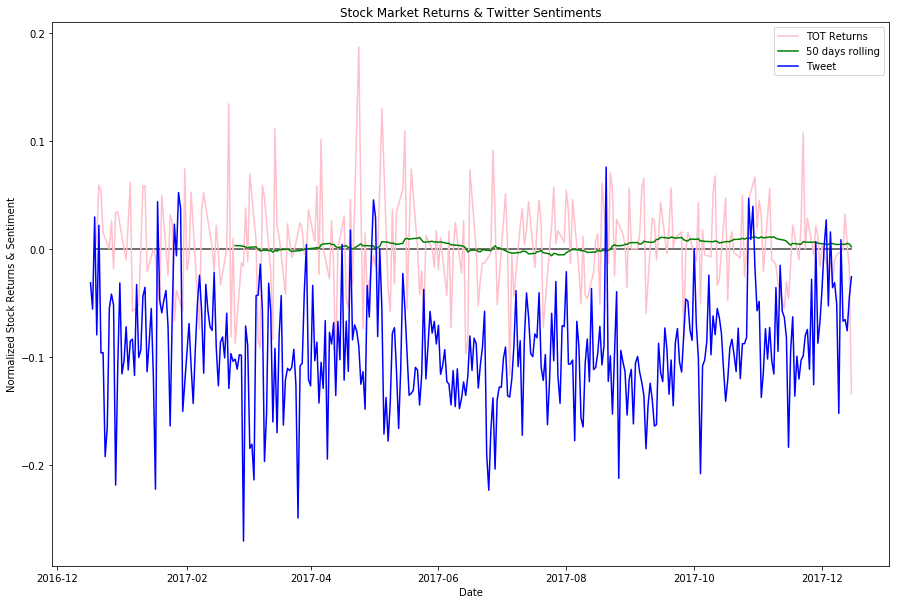

In [40]:
width = 15
height = 10

# Get the time series. This now returns a Pandas Series object indexed by date.
TOT = adj_close_returns.ix[:, 'TOT Returns']
CVX = adj_close_returns.ix[:, 'CVX Returns']
BP = adj_close_returns.ix[:, 'BP Returns']
SNP = adj_close_returns.ix[:, 'SNP Returns']
XOM = adj_close_returns.ix[:, 'XOM Returns']

short_rolling_TOT = TOT.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(width,height))
ax = fig.add_subplot(1,1,1)
ax.plot(TOT.index, TOT*0, alpha=0.75, color = "black", label='')
ax.plot(TOT.index, TOT, label='TOT Returns', color = "pink")
ax.plot(short_rolling_TOT.index, short_rolling_TOT, label='50 days rolling', color = "green")
# ax.plot(CVX.index, CVX, label='CVX Returns', color = "orange")
# ax.plot(BP.index, BP, label='BP Returns', color = "yellow")
# ax.plot(SNP.index, SNP, label='SNP Returns', color = "green")
# ax.plot(XOM.index, XOM, label='XOM Returns', color = "purple")
ax.plot(tweet_df_mean["Date"], tweet_df_mean['Compound'], label='Tweet', color = "blue")

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Stock Returns & Sentiment')
ax.set_title('Stock Market Returns & Twitter Sentiments')
ax.legend()

plt.savefig('oilprice-12_2016to12_2017')
plt.show()

In [24]:
adj_close_returns.head()

,BP,CVX,SNP,TOT,XOM,TOT Returns,CVX Returns,BP Returns,SNP Returns,XOM Returns
Date,,,,,,,,,,
2016-12-19,34.232555,113.154236,69.117783,46.930092,87.104240,0,0,0,0,0
2016-12-20,34.195099,113.442772,69.089272,47.026161,87.113876,0.0102353,0.0127497,-0.00547082,-0.00206249,0.00055313
2016-12-21,34.438545,113.404305,69.032249,47.583363,86.969368,0.0592438,-0.00169544,0.0355966,-0.00412676,-0.0082942
2016-12-22,34.560272,114.231430,68.528580,48.092537,87.537743,0.0535034,0.036468,0.0176731,-0.0364807,0.0326767
2016-12-23,34.663269,113.894806,67.340660,48.236637,87.383606,0.0149815,-0.0147343,0.0149011,-0.0866733,-0.00880403


/Users/jbui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


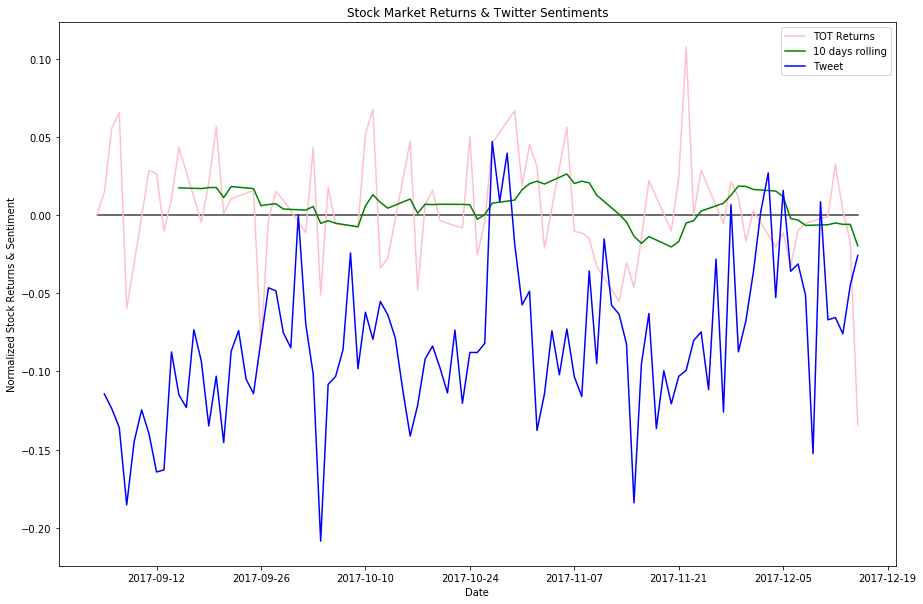

In [39]:
# narrowing the window of view
new_start_date = '2017-09-04'
tweet_df_mean2 = tweet_df_mean[tweet_df_mean["Date"] > new_start_date]
adj_close_returns2 = adj_close_returns.ix[new_start_date:end_date]

width = 15
height = 10

# Get the time series. This now returns a Pandas Series object indexed by date.
TOT = adj_close_returns2.ix[:, 'TOT Returns']
CVX = adj_close_returns2.ix[:, 'CVX Returns']
BP = adj_close_returns2.ix[:, 'BP Returns']
SNP = adj_close_returns2.ix[:, 'SNP Returns']
XOM = adj_close_returns2.ix[:, 'XOM Returns']
short_rolling_TOT = TOT.rolling(window=10).mean()


# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(width,height))
ax = fig.add_subplot(1,1,1)
ax.plot(TOT.index, TOT*0, alpha=0.75, color = "black", label='')
ax.plot(TOT.index, TOT, label='TOT Returns', color = "pink")
ax.plot(short_rolling_TOT.index, short_rolling_TOT, label='10 days rolling', color = "green")

# ax.plot(CVX.index, CVX, label='CVX Returns', color = "orange")
# ax.plot(BP.index, BP, label='BP Returns', color = "yellow")
# ax.plot(SNP.index, SNP, label='SNP Returns', color = "green")
# ax.plot(XOM.index, XOM, label='XOM Returns', color = "purple")

ax.plot(tweet_df_mean2["Date"], tweet_df_mean2['Compound'], label='Tweet', color = "blue")

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Stock Returns & Sentiment')
ax.set_title('Stock Market Returns & Twitter Sentiments')
ax.legend()

plt.savefig('oilprice-9_2017to12_2017')
plt.show()

/Users/jbui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


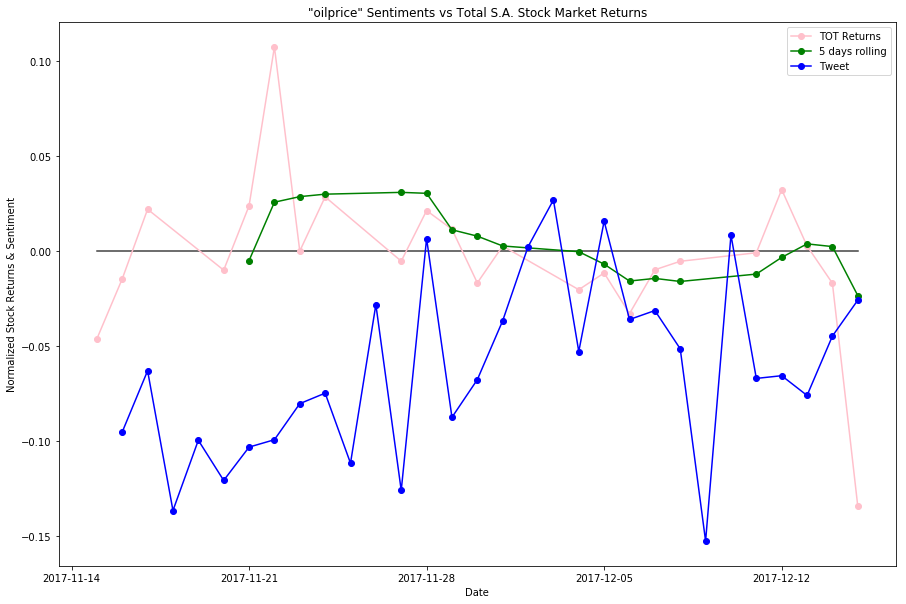

In [41]:
# narrowing the window of view
new_start_date = '2017-11-15'
tweet_df_mean3 = tweet_df_mean2[tweet_df_mean2["Date"] > new_start_date]
adj_close_returns3 = adj_close_returns2.ix[new_start_date:end_date]

width = 15
height = 10

# Get the time series. This now returns a Pandas Series object indexed by date.
TOT = adj_close_returns3.ix[:, 'TOT Returns']
CVX = adj_close_returns3.ix[:, 'CVX Returns']
BP = adj_close_returns3.ix[:, 'BP Returns']
SNP = adj_close_returns3.ix[:, 'SNP Returns']
XOM = adj_close_returns3.ix[:, 'XOM Returns']
short_rolling_TOT = TOT.rolling(window=5).mean()


# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(width,height))
ax = fig.add_subplot(1,1,1)
ax.plot(TOT.index, TOT*0, alpha=0.75, color = "black", label='')
ax.plot(TOT.index, TOT, label='TOT Returns', color = "pink", marker ='o')
ax.plot(short_rolling_TOT.index, short_rolling_TOT, label='5 days rolling', color = "green", marker ='o')

# ax.plot(CVX.index, CVX, label='CVX Returns', color = "orange")
# ax.plot(BP.index, BP, label='BP Returns', color = "yellow")
# ax.plot(SNP.index, SNP, label='SNP Returns', color = "green")
# ax.plot(XOM.index, XOM, label='XOM Returns', color = "purple")

ax.plot(tweet_df_mean3["Date"], tweet_df_mean3['Compound'], label='Tweet', color = "blue", marker ='o')

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Stock Returns & Sentiment')
ax.set_title('"oilprice" Sentiments vs Total S.A. Stock Market Returns')
ax.legend()

plt.savefig('oilprice-10_2017to12_2017')
plt.show()